In [1]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# Download and extract the dataset
url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    z.extractall()

# Load the data into DataFrames
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')


In [3]:
# Check for missing values
print(ratings.isnull().sum())
print(movies.isnull().sum())

# Drop missing values if any
ratings.dropna(inplace=True)
movies.dropna(inplace=True)


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ratings['rating'] = scaler.fit_transform(ratings[['rating']])


In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,0.777778,964982703
1,1,3,0.777778,964981247
2,1,6,0.777778,964982224
3,1,47,1.000000,964983815
4,1,50,1.000000,964982931
...,...,...,...,...
100831,610,166534,0.777778,1493848402
100832,610,168248,1.000000,1493850091
100833,610,168250,1.000000,1494273047
100834,610,168252,1.000000,1493846352


In [7]:
# Split genres into a list
movies['genres'] = movies['genres'].str.split('|')

# Create a binary matrix for genres



In [8]:
genres = set(g for sublist in movies['genres'] for g in sublist)
for genre in genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)

In [9]:
movies['genres']

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [10]:
movies

,movieId,title,genres,Sci-Fi,Horror,IMAX,Animation,Fantasy,Thriller,Comedy,...,Western,Mystery,Adventure,Drama,Romance,Film-Noir,Children,Crime,Action,Musical
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),[Drama],0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')


In [12]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.777778,NaN,0.777778,NaN,NaN,0.777778,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from sklearn.metrics import jaccard_score
import numpy as np

In [14]:
 # Fill NaN with 0 for similarity calculations
user_item_matrix_filled = user_item_matrix.fillna(0)

# Cosine Similarity
cosine_sim = cosine_similarity(user_item_matrix_filled)

# Pearson Correlation
pearson_sim = user_item_matrix_filled.T.corr(method='pearson').values

# Jaccard Index
# Binarize the matrix for Jaccard
user_item_matrix_bin = user_item_matrix_filled.applymap(lambda x: 1 if x > 0 else 0)
jaccard_sim = np.zeros((user_item_matrix_bin.shape[0], user_item_matrix_bin.shape[0]))
for i in range(user_item_matrix_bin.shape[0]):
    for j in range(user_item_matrix_bin.shape[0]):
        jaccard_sim[i, j] = jaccard_score(user_item_matrix_bin.iloc[i], user_item_matrix_bin.iloc[j])

/var/folders/3f/7k8h9fjj6cgbtz58tc2dq0xc0000gn/T/ipykernel_18060/2360377797.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix_bin = user_item_matrix_filled.applymap(lambda x: 1 if x > 0 else 0)


In [15]:
def predict_ratings(similarity_matrix, user_item_matrix):
    mean_user_rating = user_item_matrix.mean(axis=1)
    ratings_diff = (user_item_matrix.T - mean_user_rating).T
    pred = mean_user_rating[:, np.newaxis] + similarity_matrix.dot(ratings_diff) / np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return pred

# Predictions using Cosine Similarity
user_predictions_cosine = predict_ratings(cosine_sim, user_item_matrix_filled.values)

# Predictions using Pearson Correlation
user_predictions_pearson = predict_ratings(pearson_sim, user_item_matrix_filled.values)

# Predictions using Jaccard Index
user_predictions_jaccard = predict_ratings(jaccard_sim, user_item_matrix_filled.values)


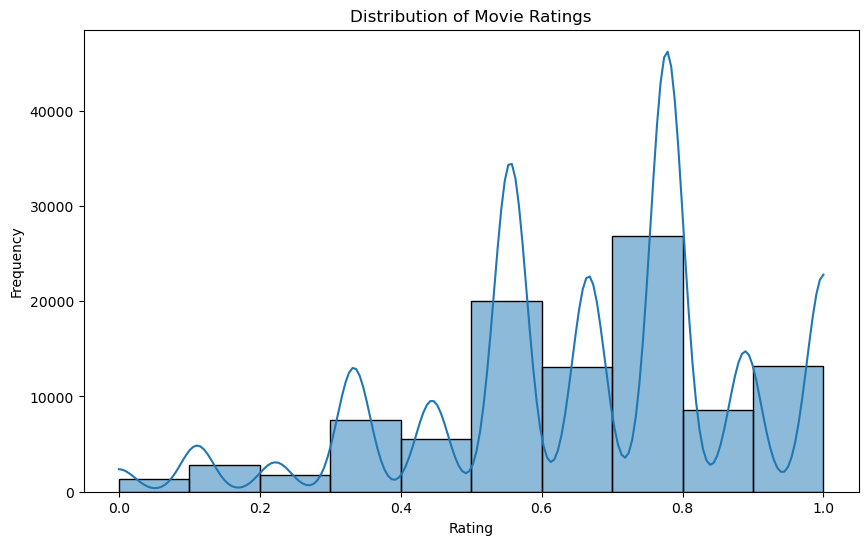

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


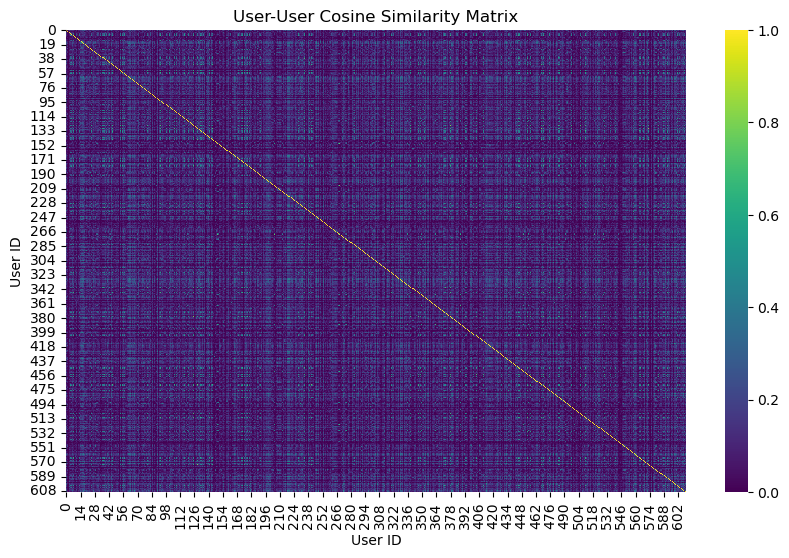

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim, cmap='viridis')
plt.title('User-User Cosine Similarity Matrix')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()


In [18]:
from scipy.sparse.linalg import svds

# Decompose the matrix
U, sigma, Vt = svds(user_item_matrix_filled.fillna(0).to_numpy(), k=50)

In [19]:
sigma = np.diag(sigma)

# Reconstruct the matrix
svd_predictions = np.dot(np.dot(U, sigma), Vt)

In [20]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=50, init='random', random_state=0)
W = nmf_model.fit_transform(user_item_matrix_filled.fillna(0))
H = nmf_model.components_

nmf_predictions = np.dot(W, H)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [21]:
nmf_predictions

array([[3.26975901e-01, 2.92122615e-01, 1.45761600e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.43438442e-04],
       [4.82778721e-02, 2.66486603e-02, 0.00000000e+00, ...,
        1.27702466e-03, 1.27702466e-03, 3.61916302e-03],
       [1.21057700e-02, 1.33190798e-02, 7.15000300e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.73084912e-06],
       ...,
       [3.03522876e-01, 3.51293343e-01, 2.69271966e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43001338e-01, 1.12731102e-01, 4.35339417e-03, ...,
        1.21122660e-04, 1.21122660e-04, 2.07200895e-05],
       [1.00519733e+00, 2.36974825e-03, 5.62349652e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])